In [1]:
%matplotlib inline

In [2]:
## Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os

In [3]:
## Study data files
mouse_metadata_path = os.path.join(os.getcwd(), 'Resources', 'Mouse_metadata.csv')
study_results_path = os.path.join(os.getcwd(), 'Resources', 'Study_results.csv')

In [4]:
# Read the mouse and study data
mouse_df = pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path)

In [5]:
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
# checking the number of mice
mouse_df.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [7]:
mouse_df.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [8]:
len(mouse_df)

249

In [9]:
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [10]:
study_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [11]:
study_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [12]:
len(study_df)

1893

In [13]:
study_df['Timepoint'].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [14]:
study_df.value_counts()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      0          45.000000           0                   2
z969      45         73.867845           4                   1
i334      30         39.005554           1                   1
i177      20         35.345361           0                   1
          25         34.082180           1                   1
                                                            ..
q610      25         40.146450           0                   1
          30         40.668343           1                   1
          35         36.561652           2                   1
q633      0          45.000000           0                   1
a203      0          45.000000           0                   1
Length: 1892, dtype: int64

In [15]:
study_df['Timepoint'].value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [16]:
## checking for duplicates 
study_df['Mouse ID'].value_counts(dropna=False)

g989    13
j989    10
g791    10
o795    10
x773    10
        ..
x226     1
h428     1
n482     1
f932     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [17]:
columns = [
    "Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]
study1_df = study_df.loc[study_df['Mouse ID'].value_counts(dropna=False),  columns]

In [18]:
study1_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
13,x930,0,45.0,0
10,z234,0,45.0,0
10,z234,0,45.0,0
10,z234,0,45.0,0
10,z234,0,45.0,0


In [19]:
len(study1_df)

249

In [20]:
## Combine the data into a single dataset
merged_df = pd.merge(mouse_df, study_df, on="Mouse ID",how="left")

In [21]:
## Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
merged1_df = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]

In [23]:
## duplicated timepoint information
merged1_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged2_df = merged_df.drop_duplicates()

In [25]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
#merged2_df = merged_df.drop_duplicates()
merged2_df = merged_df.drop_duplicates(["Mouse ID", "Timepoint"], keep= 'first')
#merged2_df = merged_df.drop_duplicates(["Mouse ID", "Timepoint"], keep= 'last')
#merged2_df = merged_df.drop_duplicates(["Mouse ID", "Timepoint"], keep= False)

In [26]:
merged2_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the clean DataFrame.
len(merged2_df)

1888

In [28]:
##confirming duplicates are dropped
merged2_df.loc[merged2_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [29]:
## Summary statistics of mean, median, variance, standard deviation and SEM of the tumor volume of each drug regimen
summ_stat = merged2_df.groupby('Drug Regimen')

In [30]:
summ_stat

In [31]:
mean_data = summ_stat['Tumor Volume (mm3)'].mean()

In [32]:
mean_data

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [33]:
median_data = summ_stat['Tumor Volume (mm3)'].median()

In [34]:
median_data

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [35]:
variance_data = summ_stat['Tumor Volume (mm3)'].var()

In [36]:
variance_data

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [37]:
Stddev_data = summ_stat['Tumor Volume (mm3)'].std()

In [38]:
Stddev_data

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [39]:
sems = summ_stat['Tumor Volume (mm3)'].sem()

In [40]:
sems

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [41]:
sum_stat_df = pd.DataFrame({"Mean": mean_data, "Median": median_data, "Variance": variance_data, "Standard Deviation": Stddev_data, "SEM": sems})

In [42]:
sum_stat_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# Using the aggregation method, produce the same summary statistics in a single line
aggregation_method = summ_stat.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

In [44]:
aggregation_method

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
barplot_df = merged2_df.groupby('Drug Regimen').count()['Timepoint']

In [46]:
barplot_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

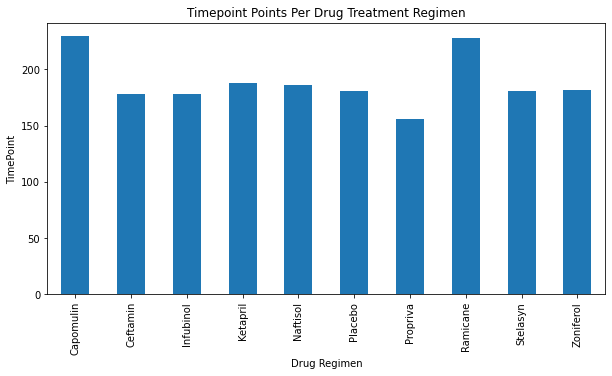

<Figure size 432x288 with 0 Axes>

In [47]:
## Generating a bar plot using pandas
barplot_df.plot(kind="bar", figsize=(10,5))
plt.ylabel("TimePoint")
plt.title("Timepoint Points Per Drug Treatment Regimen")
plt.show()
plt.tight_layout()

In [48]:
## Generating a bar plot using Matpltlib
# Set x axis and tick locations
#x_axis = np.arange(len(barplot_df))
#tick_locations = [value for value in x_axis]

In [49]:
## Generating a bar plot using Matpltlib
import numpy as np
#plt.figure(figsize=(10,5))
## reset index for barplot_df
barplot = barplot_df.reset_index()
barplot

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [50]:
# Set x axis and tick locations
x_axis = np.arange(len(barplot))
tick_locations = [value for value in x_axis]

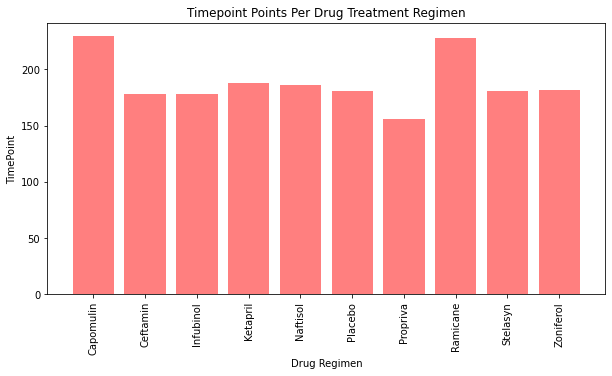

<Figure size 432x288 with 0 Axes>

In [51]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis, barplot["Timepoint"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, barplot["Drug Regimen"], rotation="vertical")
plt.title("Timepoint Points Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("TimePoint")
plt.show()
plt.tight_layout()

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = mouse_df.groupby(["Sex"]).count().reset_index()

In [53]:
sex_df

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g)
0,Female,124,124,124,124
1,Male,125,125,125,125


In [54]:
### create a new dataframe for the total per sex
sex1_df = sex_df[["Sex","Mouse ID"]]

In [55]:
sex1_df

,Sex,Mouse ID
0,Female,124
1,Male,125


Text(0.5, 1.0, 'Male & Female Mice Distribution')

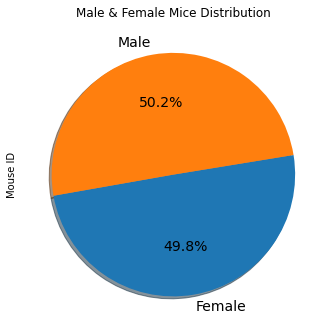

In [56]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
sex1_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=sex1_df["Sex"], legend = False, fontsize=14)
plt.title("Male & Female Mice Distribution")

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["lightcoral", "lightskyblue"]
labels = ["Female", "Male"]
sizes = [124, 125]
explode = (0.1, 0)

(-1.1007415699207657,
 1.1016946163825478,
 -1.2067664421469415,
 1.1059346302803437)

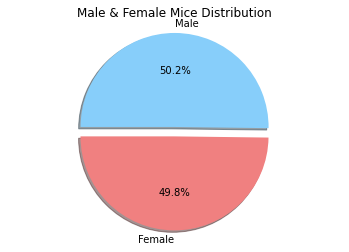

In [58]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("Male & Female Mice Distribution")
plt.axis("equal")

In [59]:
## Quartiles, Outliers and Box

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
merged2_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [61]:
### new dataframe to calculate tumor volume in the 4 drugs
capomulin_df = merged2_df.loc[merged2_df["Drug Regimen"] == "Capomulin",:]

In [62]:
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [63]:
capomulin_final = capomulin_df.groupby('Mouse ID').max()['Timepoint']

In [64]:
# Start by getting the last (greatest) timepoint for each mouse
capomulin_final

Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
i557    45
i738    45
j119    45
j246    35
l509    45
l897    45
m601    45
m957    45
r157    15
r554    45
r944    45
s185    45
s710    45
t565    45
u364    45
v923    45
w150    10
w914    45
x401    45
y793    45
Name: Timepoint, dtype: int64

In [65]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
## Capomulin data
capomulin_merge = pd.merge(capomulin_final, merged_df, on=("Mouse ID","Timepoint"),how="left")

In [66]:
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [67]:
finalvol_capomulin = capomulin_merge.sort_values(['Tumor Volume (mm3)'], ascending=True).reset_index()

In [68]:
finalvol_capomulin['Tumor Volume (mm3)']

0     23.343598
1     28.430964
2     28.484033
3     30.485985
4     31.023923
5     31.896238
6     32.377357
7     33.329098
8     34.455298
9     36.041047
10    37.074024
11    37.311846
12    38.125164
13    38.753265
14    38.846876
15    38.939633
16    38.982878
17    39.952347
18    40.159220
19    40.658124
20    40.728578
21    41.483008
22    41.581521
23    46.539206
24    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [69]:
# If the data is in a dataframe, we use pandas to give quartile calculations
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = finalvol_capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

In [70]:
print(f"The lower quartile of capomulin is: {lowerq}")
print(f"The upper quartile of capomulin is: {upperq}")
print(f"The interquartile range of capomulin is: {iqr}")
print(f"The the median of capomulin is: {quartiles[0.5]} ")

The lower quartile of capomulin is: 32.37735684
The upper quartile of capomulin is: 40.1592203
The interquartile range of capomulin is: 7.781863460000004
The the median of capomulin is: 38.125164399999996 


In [71]:
 # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [72]:
finalvol_capomulin_df = pd.DataFrame(capomulin_final)

In [73]:
finalvol_capomulin_df.head()

,Timepoint
Mouse ID,
b128,45
b742,45
f966,20
g288,45
g316,45


In [74]:
##Ramicane data
ramicane_df = merged2_df.loc[merged2_df["Drug Regimen"] == "Ramicane",:]

In [75]:
ramicane_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [76]:
ramicane_final = ramicane_df.groupby('Mouse ID').max()['Timepoint']

In [77]:
ramicane_final

Mouse ID
a411    45
a444    45
a520    45
a644    45
c458    30
c758    45
d251    45
e662    45
g791    45
i177    45
i334    45
j913    45
j989    45
k403    45
m546    45
n364    45
q597    45
q610    35
r811    45
r921    30
s508    45
u196    45
w678     5
y449    15
z578    45
Name: Timepoint, dtype: int64

In [78]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramicane_merge = pd.merge(ramicane_final, merged_df, on=("Mouse ID","Timepoint"),how="left")

In [79]:
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [80]:
finalvol_ramicane = ramicane_merge.sort_values(['Tumor Volume (mm3)'], ascending=True).reset_index()

In [81]:
finalvol_ramicane['Tumor Volume (mm3)']

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    36.561652
13    37.225650
14    37.311236
15    38.342008
16    38.407618
17    38.810366
18    40.659006
19    40.667713
20    43.047543
21    43.166373
22    43.419381
23    44.183451
24    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [82]:
# If the data is in a dataframe, we use pandas to give quartile calculations
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = finalvol_ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

In [83]:
print(f"The lower quartile of ramicane is: {lowerq}")
print(f"The upper quartile of ramicane is: {upperq}")
print(f"The interquartile range of ramicane is: {iqr}")
print(f"The the median of ramicane is: {quartiles[0.5]} ")

The lower quartile of ramicane is: 31.56046955
The upper quartile of ramicane is: 40.65900627
The interquartile range of ramicane is: 9.098536719999998
The the median of ramicane is: 36.56165229 


In [84]:
## Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [85]:
finalvol_ramicane_df = pd.DataFrame(ramicane_final)

In [86]:
finalvol_ramicane_df.head()

,Timepoint
Mouse ID,
a411,45
a444,45
a520,45
a644,45
c458,30


In [87]:
##Infubinol data
infubinol_df = merged2_df.loc[merged2_df["Drug Regimen"] == "Infubinol",:]

In [88]:
infubinol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [89]:
infubinol_final = infubinol_df.groupby('Mouse ID').max()['Timepoint']

In [90]:
infubinol_final

Mouse ID
a203    45
a251    45
a577    30
a685    45
c139    45
c326     5
c895    30
e476    45
f345    45
i386    40
k483    45
k804    35
m756     5
n671    30
o809    35
o813     5
q132    30
s121    25
v339     5
v719    20
v766    15
w193    20
w584    30
y163    45
z581    45
Name: Timepoint, dtype: int64

In [91]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
infubinol_merge = pd.merge(infubinol_final, merged_df, on=("Mouse ID","Timepoint"),how="left")

In [92]:
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [93]:
finalvol_infubinol = infubinol_merge.sort_values(['Tumor Volume (mm3)'], ascending=True).reset_index()

In [94]:
finalvol_infubinol['Tumor Volume (mm3)']

0     36.321346
1     45.699331
2     46.250112
3     47.010364
4     50.005138
5     51.542431
6     54.048608
7     54.656549
8     55.629428
9     55.650681
10    57.031862
11    58.268442
12    60.165180
13    60.918767
14    60.969711
15    62.117279
16    62.435404
17    62.754451
18    65.525743
19    66.083066
20    66.196912
21    67.289621
22    67.685569
23    67.973419
24    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [95]:
# If the data is in a dataframe, we use pandas to give quartile calculations
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = finalvol_infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

In [96]:
print(f"The lower quartile of infubinol is: {lowerq}")
print(f"The upper quartile of infubinol is: {upperq}")
print(f"The interquartile range of infubinol is: {iqr}")
print(f"The the median of infubol is: {quartiles[0.5]} ")

The lower quartile of infubinol is: 54.04860769
The upper quartile of infubinol is: 65.52574285
The interquartile range of infubinol is: 11.477135160000003
The the median of infubol is: 60.16518046 


In [97]:
## Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [98]:
finalvol_infubinol_df = pd.DataFrame(infubinol_final)

In [99]:
finalvol_infubinol_df.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a577,30
a685,45
c139,45


In [100]:
##Ceftamin data
ceftamin_df = merged2_df.loc[merged2_df["Drug Regimen"] == "Ceftamin",:]

In [101]:
ceftamin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1


In [102]:
ceftamin_final = ceftamin_df.groupby('Mouse ID').max()['Timepoint']

In [103]:
ceftamin_final

Mouse ID
a275    45
b447     0
b487    25
b759    30
f436    15
h531     5
j296    45
k210    45
l471    45
l490    30
l558    10
l661    45
l733    45
o287    45
p438    45
q483    40
t573     0
u149    25
u153     0
w151    45
x226     0
x581    45
x822    45
y769    45
y865    45
Name: Timepoint, dtype: int64

In [104]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceftamin_merge = pd.merge(ceftamin_final, merged_df, on=("Mouse ID","Timepoint"),how="left")

In [105]:
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [106]:
finalvol_ceftamin = ceftamin_merge.sort_values(['Tumor Volume (mm3)'], ascending=True).reset_index()

In [107]:
finalvol_ceftamin['Tumor Volume (mm3)']

0     45.000000
1     45.000000
2     45.000000
3     45.000000
4     46.784535
5     47.784682
6     48.722078
7     52.925348
8     55.742829
9     56.057749
10    57.918381
11    59.741901
12    59.851956
13    61.386660
14    61.433892
15    61.849023
16    62.999356
17    64.192341
18    64.299830
19    64.634949
20    64.729837
21    67.527482
22    67.748662
23    68.594745
24    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [108]:
# If the data is in a dataframe, we use pandas to give quartile calculations
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = finalvol_ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

In [109]:
print(f"The lower quartile of ceftamin is: {lowerq}")
print(f"The upper quartile of ceftamin is: {upperq}")
print(f"The interquartile range of ceftamin is: {iqr}")
print(f"The the median of ceftamin is: {quartiles[0.5]} ")

The lower quartile of ceftamin is: 48.72207785
The upper quartile of ceftamin is: 64.29983003
The interquartile range of ceftamin is: 15.577752179999997
The the median of ceftamin is: 59.85195552 


In [110]:
## Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [111]:
finalvol_ceftamin_df = pd.DataFrame(ceftamin_final)

In [112]:
finalvol_ceftamin_df.head()

,Timepoint
Mouse ID,
a275,45
b447,0
b487,25
b759,30
f436,15


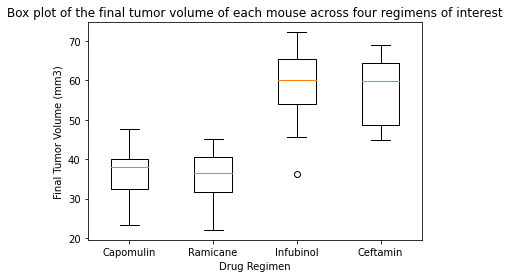

In [113]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [finalvol_capomulin['Tumor Volume (mm3)'], finalvol_ramicane['Tumor Volume (mm3)'], finalvol_infubinol['Tumor Volume (mm3)'], finalvol_ceftamin['Tumor Volume (mm3)']]
fig7, ax7 = plt.subplots()
ax7.set_title('Tumors')
ax7.set_ylabel('Final Tumor Volume (mm3)')
ax7.set_xlabel('Drug Regimen')
ax7.set_title('Box plot of the final tumor volume of each mouse across four regimens of interest')
ax7.boxplot(data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

In [114]:
## Line and Scatter Plots

In [115]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [116]:
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [117]:
capomulin2_line = capomulin_df.loc[capomulin_df["Mouse ID"] == 'i557',:]

In [118]:
capomulin2_line

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0
435,i557,Capomulin,Female,1,24,20,43.967895,0
436,i557,Capomulin,Female,1,24,25,44.596219,0
437,i557,Capomulin,Female,1,24,30,45.261384,0
438,i557,Capomulin,Female,1,24,35,45.941949,0
439,i557,Capomulin,Female,1,24,40,46.821070,1
440,i557,Capomulin,Female,1,24,45,47.685963,1


In [119]:
# Give our graph axis labels
x_axis_data = capomulin2_line['Timepoint']
#x_axis_data
y_axis_data = capomulin2_line['Tumor Volume (mm3)']
#y_axis_data

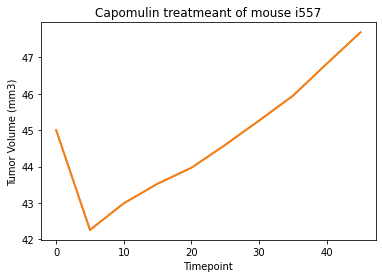

In [120]:
plt.plot(x_axis_data, y_axis_data)
plt.title('Capomulin treatmeant of mouse i557')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis_data, y_axis_data,linewidth=2, markersize=12)
plt.show()

In [121]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor_volume = capomulin_df.groupby(["Mouse ID"]).mean()

In [122]:
average_tumor_volume.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


In [123]:
average_tumor_volume1 = average_tumor_volume[['Weight (g)', 'Tumor Volume (mm3)']]

In [124]:
average_tumor_volume1.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


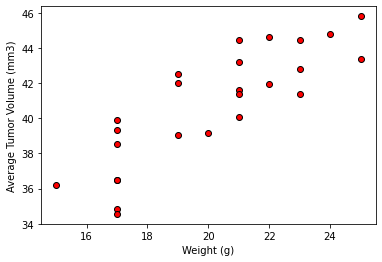

In [125]:
plt.scatter(average_tumor_volume1['Weight (g)'],average_tumor_volume1['Tumor Volume (mm3)'],marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title=('Scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen')
# Set the upper and lower limits of our y axis
#plt.ylim(180,620)
# Set the upper and lower limits of our x axis
#plt.xlim(11,26)
#plt.savefig('scatterplot')
plt.show()
#plt.scatter('Weight (g)', 'Tumor Volume (mm3)', marker="o", facecolors="red", edgecolors="black")

In [126]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#correlation coefficient
print(f"The correlation coefficient between average tumor volume acid and mouse weight is {round(st.pearsonr(average_tumor_volume1['Weight (g)'],average_tumor_volume1['Tumor Volume (mm3)'])[0],2)}")

The correlation coefficient between average tumor volume acid and mouse weight is 0.84


In [127]:
# linear regression model
from scipy import stats
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(average_tumor_volume1['Weight (g)'], average_tumor_volume1['Tumor Volume (mm3)'])
vc_fit = vc_slope * average_tumor_volume1['Weight (g)'] + vc_int

In [128]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err

(0.9544396890241045,
 21.552160532685015,
 0.8419363424694718,
 1.3225722434712642e-07,
 0.1275435903320134)

In [129]:
vc_fit

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64

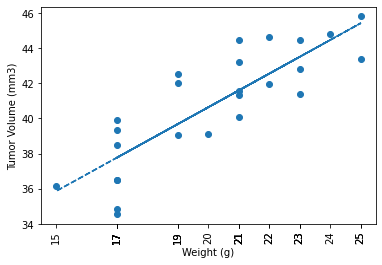

In [130]:
#year = crime_data.iloc[:,0]
#violent_crime_rate = crime_data.iloc[:,3]
plt.scatter(average_tumor_volume1['Weight (g)'],average_tumor_volume1['Tumor Volume (mm3)'])
plt.plot(average_tumor_volume1['Weight (g)'],vc_fit,"--")
plt.xticks(average_tumor_volume1['Weight (g)'], rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [128]:
## Observations
#1) There is apositive correlation (0.84) between the average tumor volume and weight of mice. This indicates the drug Capomulin was effective
#2) On an average more male mice were used in the study than female
#3) Capomulin and Ramicane were effect with time over the course of the study